<a href="https://colab.research.google.com/github/Guhan2348519/ADVANCED-ML-tasks/blob/main/2348519_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_iris, load_diabetes
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
%matplotlib inline

In [2]:
cancer_data=load_breast_cancer()
print(cancer_data)


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
df = pd.DataFrame(cancer_data['data'],columns=cancer_data['feature_names'])
#(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.Series(cancer_data.target, name='target')

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data =scaler.transform(df)

In [11]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=42)
classifiers = [
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

for clf_name, clf in classifiers:
    print(f"{clf_name}:")
    print("Before Dimensionality Reduction : ")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_bef_reduction = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {acc_bef_reduction:.4f} ")


K-Nearest Neighbors:
Before Dimensionality Reduction : 
Accuracy Score: 0.9591 
Decision Tree:
Before Dimensionality Reduction : 
Accuracy Score: 0.9415 
Random Forest:
Before Dimensionality Reduction : 
Accuracy Score: 0.9708 


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [14]:
pca.fit(scaled_data)
PCA(n_components=2)

PCA(n_components=2)

In [15]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)


(569, 30)
(569, 2)


Text(0, 0.5, 'Second Principle Component')

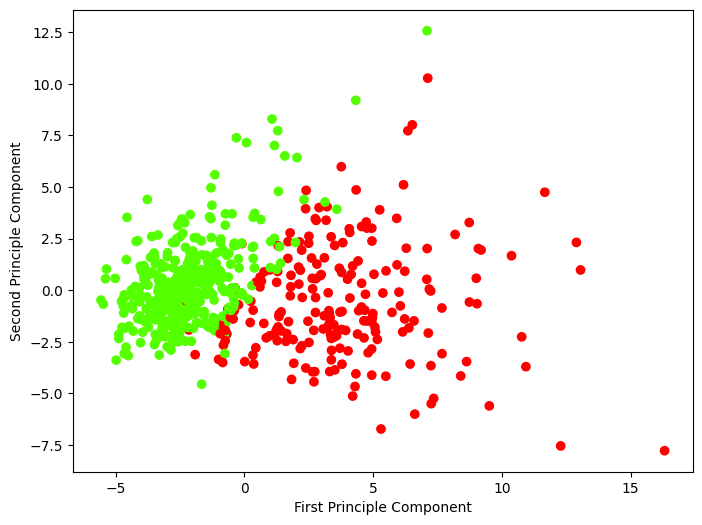

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer_data['target'],cmap='prism')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [ ]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=42)

# Define the classifiers
classifiers = [
    ('KNearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

# Train and evaluate each classifier
for clf_name, clf in classifiers:
    print(f"{clf_name}:")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_bef_reduction = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score after PCA: {acc_bef_reduction:.4f}")


KNearest Neighbors:
Accuracy Score after PCA: 0.9591
Decision Tree:
Accuracy Score after PCA: 0.9181
Random Forest:
Accuracy Score after PCA: 0.9532


In [20]:
n_components = min(scaled_data.shape[1], len(set(y)) - 1)
lda = LinearDiscriminantAnalysis(n_components=n_components)
lda.fit(scaled_data, y)
X_lda = lda.transform(scaled_data)

X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.3, random_state=42)

classifiers = [
    ('KNearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

for clf_name, clf in classifiers:
    print(f"{clf_name}:")
    clf.fit(X_train_lda, y_train_lda)
    y_pred_lda = clf.predict(X_test_lda)
    acc_after_lda = accuracy_score(y_test_lda, y_pred_lda)
    print(f"Accuracy Score after LDA: {acc_after_lda:.4f}")


KNearest Neighbors:
Accuracy Score after LDA: 0.9649
Decision Tree:
Accuracy Score after LDA: 0.9766
Random Forest:
Accuracy Score after LDA: 0.9766


**IRIS DATASET**

In [30]:
iris_data=load_iris()
print(iris_data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [34]:
iris_X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_Y = pd.Series(iris_data.target, name='Species')

print(iris_X.head())
print(iris_Y.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [35]:
dataframe = pd.DataFrame(iris_data['data'],columns=iris_data['feature_names'])
dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
iris_X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_Y = pd.Series(iris_data.target, name='Species')


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataframe)
scale_data =scaler.transform(dataframe)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(scale_data, iris_Y, test_size=0.3, random_state=42)

classifiers = [
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

for clf_name, clf in classifiers:
    print(f"{clf_name}:")
    print("Before Dimensionality Reduction : ")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_bef_reduction = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {acc_bef_reduction:.4f} ")


K-Nearest Neighbors:
Before Dimensionality Reduction : 
Accuracy Score: 1.0000 
Decision Tree:
Before Dimensionality Reduction : 
Accuracy Score: 1.0000 
Random Forest:
Before Dimensionality Reduction : 
Accuracy Score: 1.0000 


In [53]:
pca.fit(scale_data)
PCA(n_components=2)

PCA(n_components=2)

In [50]:
x1_pca = pca.transform(scale_data)
print(scale_data.shape)
print(x1_pca.shape)


(150, 4)
(150, 2)


Text(0, 0.5, 'Second Principle Component')

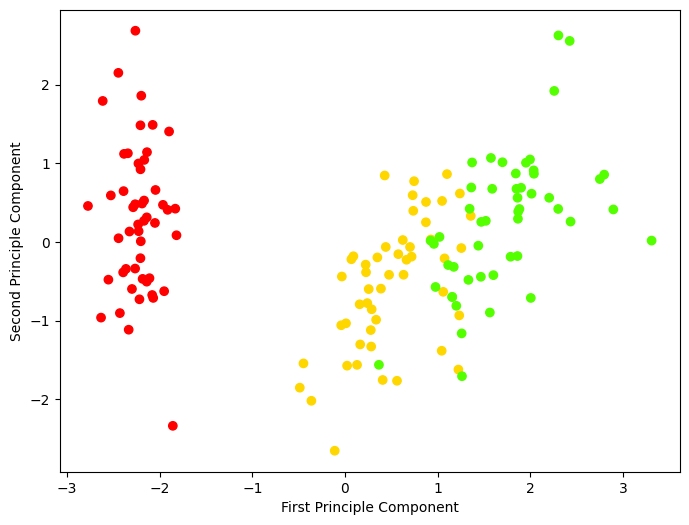

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(x1_pca[:,0],x1_pca[:,1],c=iris_data['target'],cmap='prism')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [54]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [59]:

X_train, X_test, y_train, y_test = train_test_split(x1_pca, iris_data['target'], test_size=0.3, random_state=42)
classifiers = [
    ('KNearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]
for clf_name, clf in classifiers:
    print(f"{clf_name}:")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_after_reduction = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score after PCA: {acc_after_reduction:.4f}")


KNearest Neighbors:
Accuracy Score after PCA: 0.9556
Decision Tree:
Accuracy Score after PCA: 0.9556
Random Forest:
Accuracy Score after PCA: 0.9556


In [63]:
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit_transform(scale_data, iris_data['target'])

X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(x_lda, iris_data['target'], test_size=0.3, random_state=42)



In [61]:
classifiers = [
    ('KNearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

for clf_name, clf in classifiers:
    print(f"{clf_name}:")
    clf.fit(X_train_lda, y_train_lda)
    y_pred_lda = clf.predict(X_test_lda)
    acc_lda = accuracy_score(y_test_lda, y_pred_lda)
    print(f"Accuracy Score after LDA: {acc_lda:.4f}")


KNearest Neighbors:
Accuracy Score after LDA: 1.0000
Decision Tree:
Accuracy Score after LDA: 1.0000
Random Forest:
Accuracy Score after LDA: 1.0000


**Diabetics dataset**

In [93]:
diabetes_data=load_diabetes()
print(diabetes_data)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [108]:
dataf=pd.DataFrame(diabetes_data['data'],columns=diabetes_data['feature_names'])
dataf.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [109]:
X2 = diabetes_data.data
y2 = diabetes_data.target


In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataf)
scaler_data =scaler.transform(dataf)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
classifiers = [
    ('KNearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

for clf_name, clf in classifiers:
    print(f"{clf_name}:")
    clf.fit(X_train_lda, y_train_lda)
    y_pred_lda = clf.predict(X_test_lda)
    acc_lda = accuracy_score(y_test_lda, y_pred_lda)
    print(f"Accuracy Score after LDA: {acc_lda:.4f}")

KNearest Neighbors:
Accuracy Score after LDA: 1.0000
Decision Tree:
Accuracy Score after LDA: 1.0000
Random Forest:
Accuracy Score after LDA: 1.0000


In [114]:
pca.fit(scaler_data)
PCA(n_components=2)


PCA(n_components=2)

In [115]:
x2_pca = pca.transform(scaler_data)
print(scaler_data.shape)
print(x2_pca.shape)


(442, 10)
(442, 2)


Text(0, 0.5, 'Second Principle Component')

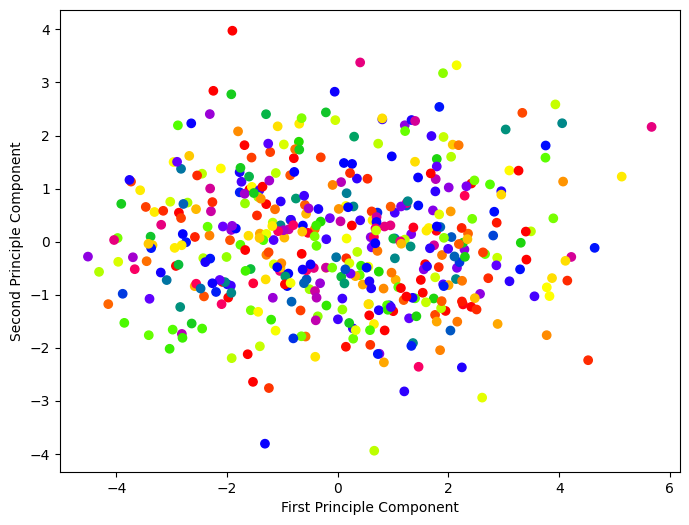

In [117]:
plt.figure(figsize=(8,6))
plt.scatter(x2_pca[:,0],x2_pca[:,1],c=diabetes_data['target'],cmap='prism')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [119]:
pca.components_

array([[ 0.2164309 ,  0.18696688,  0.30316216,  0.27173773,  0.34325511,
         0.35186068, -0.28243681,  0.4288337 ,  0.37861802,  0.32218296],
       [ 0.04436721, -0.3865472 , -0.15628128, -0.138266  ,  0.57302691,
         0.45594185,  0.50623907, -0.06818072, -0.026187  , -0.08494884]])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(x2_pca, diabetes_data['target'], test_size=0.3, random_state=42)
classifiers = [
    ('KNearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]
for clf_name, clf in classifiers:
    print(f"{clf_name}:")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_after_reduction = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score after PCA: {acc_after_reduction:.4f}")


KNearest Neighbors:
Accuracy Score after PCA: 0.0150
Decision Tree:
Accuracy Score after PCA: 0.0000
Random Forest:
Accuracy Score after PCA: 0.0000
